In [1]:
# import needed libraries
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img,img_to_array,array_to_img

In [2]:
# Input paths
train_dir = "/kaggle/input/fall-detection-dataset/fall_dataset/images/train"
val_dir = "/kaggle/input/fall-detection-dataset/fall_dataset/images/val"  

# Check the existence of the images folder
DATA = '/kaggle/working/DATA'
os.makedirs(DATA, exist_ok=True)  # This creates the folder if it does not exist

# Move images from the training and validation folders to the merging folder
for folder in [train_dir, val_dir]:
    for filename in os.listdir(folder):
        src_path = os.path.join(folder, filename)
        dest_path = os.path.join(DATA, filename)

        # Verify that a file with the same name already exists in the destination folder
        if os.path.exists(dest_path):
            base_name, extension = os.path.splitext(filename)
            counter = 1
            new_filename = f"{base_name}_{counter}{extension}"
            new_dest_path = os.path.join(DATA, new_filename)

            # Continue with the new naming until we find an unused name     
            while os.path.exists(new_dest_path):
                counter += 1
                new_filename = f"{base_name}_{counter}{extension}"
                new_dest_path = os.path.join(DATA, new_filename)

            # Copy the file using the new name    
            shutil.copy(src_path, new_dest_path)
        else:
            # Copy the file if there is no duplicate name
            shutil.copy(src_path, dest_path)

print("The data has been successfully merged and saved")

The data has been successfully merged and saved


In [3]:
def count_images_in_folder(folder_path):
    # تحديد الامتدادات الشائعة للصور
    image_extensions = ('.jpg', '.jpeg', '.png')
    
    # عد الملفات ذات امتدادات الصور
    image_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))
    
    print(f"Numbers of images: {image_count}")

# استبدل "path_to_folder" بمسار المجلد الذي تريد عد الصور فيه
count_images_in_folder("/kaggle/working/DATA")

Numbers of images: 485


In [4]:
# المسار إلى مجلد الصور غير المصنفة
source_path = "/kaggle/working/DATA"
fall_path = '/kaggle/working/DATA/Fall'
not_fall_path = '/kaggle/working/DATA/Not Fall'

# إنشاء المجلدين إذا لم يكونا موجودين
os.makedirs(fall_path, exist_ok=True)
os.makedirs(not_fall_path, exist_ok=True)

# تصنيف الصور
# تقسيم الصور إلى مجلدات fall و not_fall
for image_name in os.listdir(source_path):
    image_path = os.path.join(source_path, image_name)
    if not os.path.isfile(image_path):  # تجاوز المجلدات أو الملفات غير الصور
        continue
        
    # إذا كان اسم الملف يشير إلى السقوط
    if "fall" in image_name.lower() and 'not fallen' not in image_name.lower():  # مثال على اسم يحتوي على "fall"
        shutil.move(image_path, fall_path)
    else:  # الباقي يذهب إلى not_fall
        shutil.move(image_path, not_fall_path)
        
print("Classification completed successfully.")

Classification completed successfully.


In [5]:
def count_images_in_folder(folder_path):
    # تحديد الامتدادات الشائعة للصور
    image_extensions = ('.jpg', '.jpeg', '.png')
    
    # عد الملفات ذات امتدادات الصور
    image_count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))
    
    print(f"Numbers of images: {image_count}")

# استبدل "path_to_folder" بمسار المجلد الذي تريد عد الصور فيه
count_images_in_folder("/kaggle/working/DATA/Fall")
count_images_in_folder("/kaggle/working/DATA/Not Fall")

Numbers of images: 278
Numbers of images: 207


In [6]:
pip install mediapipe

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 52.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.1.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires protobuf<4,>3.12.2, but you have protobuf 4.25.5 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 17.0.0 which is inc

In [7]:
import mediapipe as mp
import cv2
import csv
import numpy as np

# إعداد MediaPipe Pose
mp_pose = mp.solutions.pose

# إعداد الكائنات
pose = mp_pose.Pose(
    static_image_mode=True,  # خاصية لاستخدام الصور الثابتة
    model_complexity=2,      # 0 = BlazePose Lite، 1 = BlazePose Full، 2 = BlazePose Heavy
    min_detection_confidence=0.5,  # ثقة الكشف
    min_tracking_confidence=0.5    # ثقة التتبع
)

# ملف CSV لحفظ البيانات
with open("pose_data.csv", "w", newline="") as file:
    writer = csv.writer(file)

    # كتابة أسماء الأعمدة
    headers = ["x_" + str(i) for i in range(33)] + \
              ["y_" + str(i) for i in range(33)] + \
              ["z_" + str(i) for i in range(33)] + ["label"]
    writer.writerow(headers)

    # تحديد مسار الصور وتصنيفاتها
    dataset_path = "/kaggle/working/DATA"  # ضع مسار الصور هنا
    for label in ["Fall", "Not Fall"]:  # التصنيفات
        folder_path = os.path.join(dataset_path, label)
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            image = cv2.imread(image_path)

            # التحقق من صلاحية الصورة
            if image is None:
                print(f"Error reading image: {image_path}")
                continue
                
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
            # استخراج المعالم باستخدام Pose
            try:
                pose_results = pose.process(rgb_image)
                
                # استخراج معالم Pose (x, y, z)
                if pose_results.pose_landmarks:
                    landmarks = pose_results.pose_landmarks.landmark
                    row = []
                    for landmark in landmarks:
                        row.extend([landmark.x, landmark.y, landmark.z])  # x, y, z
                    row.append(1 if label == "Fall" else 0)  # تصنيف الصورة
                    writer.writerow(row)
                else:
                    print(f"No landmarks detected in image: {image_path}")
            except Exception as e:
                print(f"Error processing image {image_path}: {str(e)}")

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1734825017.628416      99 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734825017.796272      99 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734825017.860490      99 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


No landmarks detected in image: /kaggle/working/DATA/Fall/fall026_1.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall019_1.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall200.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall060_1.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall027.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall171.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall064.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall030_1.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall128.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall129.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall044_1.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall025_1.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall100.jpg
No landmarks detected in image: /kaggle/working/DATA/Fall/fall161.jpg
No landm

In [8]:
data = pd.read_csv("pose_data.csv")
print(f"Number of rows: {data.shape[0]}")

Number of rows: 461


W0000 00:00:1734825058.297800     106 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734825058.487079     106 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


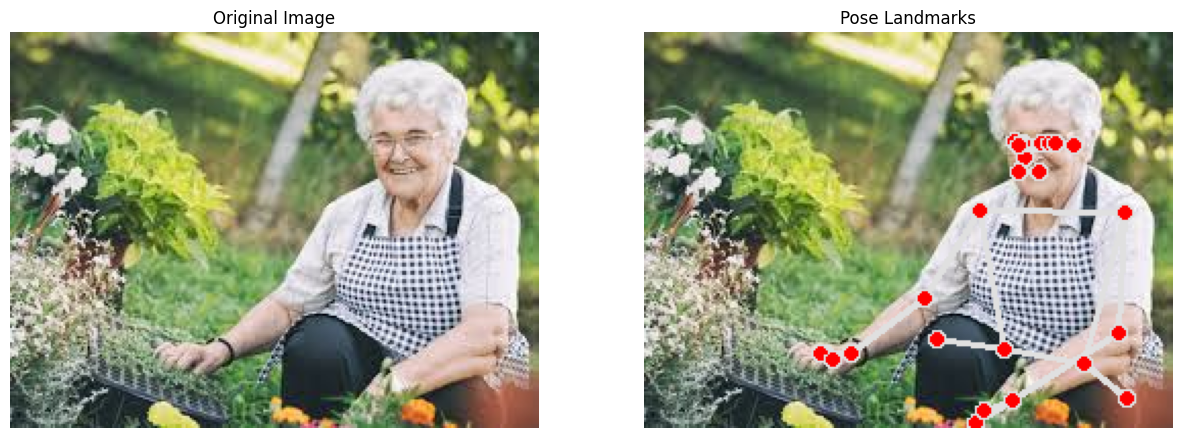

In [9]:
import matplotlib.pyplot as plt

def draw_pose_landmarks(image_path, output_path=None):
    """
    يرسم المعالم (landmarks) حول أي صورة باستخدام Mediapipe Pose.
    
    Args:
        image_path (str): مسار الصورة.
    """
    # إعداد MediaPipe Pose
    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils

    # قراءة الصورة
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Error reading image: {image_path}")
  
    # حفظ نسخة من الصورة الأصلية لعرضها لاحقًا
    original_image = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
    
    # تحويل الصورة إلى RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # معالجة الصورة باستخدام Mediapipe Pose
    with mp_pose.Pose(
        static_image_mode=True,
        model_complexity=2,
        min_detection_confidence=0.5
    ) as pose:
        pose_results = pose.process(rgb_image)

        # التحقق من وجود المعالم
        if pose_results.pose_landmarks:
            # رسم المعالم على الصورة
            mp_drawing.draw_landmarks(image, pose_results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            
            # تحويل الصورة مع المعالم إلى RGB لعرضها
            processed_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # عرض الصور قبل وبعد
            plt.figure(figsize=(15, 10))
            # الصورة الأصلية
            plt.subplot(1, 2, 1)
            plt.imshow(original_image)
            plt.title("Original Image")
            plt.axis("off")
            
            # الصورة مع المعالم
            plt.subplot(1, 2, 2)
            plt.imshow(processed_image)
            plt.title("Pose Landmarks")
            plt.axis("off")
            
            plt.show()
            
        else:
            print(f"No landmarks detected in image: {image_path}")

# مثال على الاستخدام
image_path = "/kaggle/input/fall-de/images (3).jpeg"  # استبدل بمسار الصورة

draw_pose_landmarks(image_path)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# قراءة البيانات
data = pd.read_csv("pose_data.csv")
X = data.drop("label", axis=1)  # النقاط
y = data["label"]  # التصنيفات

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

# تدريب الموديل
model = RandomForestClassifier()
model.fit(X_train, y_train)

# تقييم الموديل
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.967741935483871


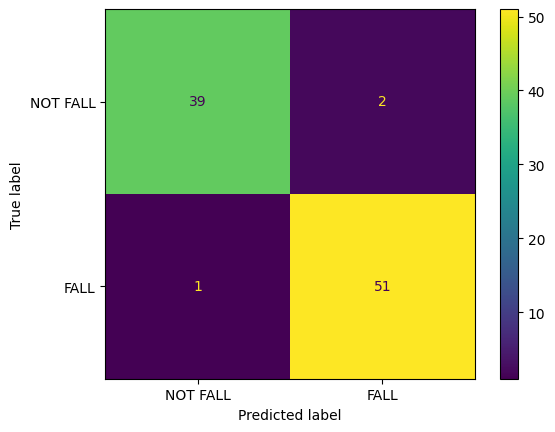

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NOT FALL", "FALL"])
disp.plot()

In [47]:
from sklearn.metrics import classification_report

y_pred_classes = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_classes, target_names=["NOT FALL", "FALL"]))

              precision    recall  f1-score   support

    NOT FALL       0.97      0.95      0.96        41
        FALL       0.96      0.98      0.97        52

    accuracy                           0.97        93
   macro avg       0.97      0.97      0.97        93
weighted avg       0.97      0.97      0.97        93



In [48]:
pip install joblib

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [49]:
import joblib

# حفظ النموذج المدرب
joblib.dump(model, "random_forest_model.pkl")

print("The model was saved successfully!")

The model was saved successfully!


In [50]:
# تحميل النموذج
loaded_model = joblib.load("random_forest_model.pkl")

# استخدام النموذج المحمل لإجراء التنبؤات
y_pred = loaded_model.predict(X_test)
print("Accuracy atfer load:", accuracy_score(y_test, y_pred))


Accuracy atfer load: 0.967741935483871


In [58]:
import cv2
import mediapipe as mp
import csv
import os
import numpy as np
import joblib

# تحميل النموذج
model = joblib.load("/kaggle/working/random_forest_model.pkl")

# إعداد MediaPipe Pose
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)


# دالة للتنبؤ بحالة السقوط باستخدام نموذج التعلم الآلي
def predict_fall(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or invalid path.")

    # تحويل الصورة إلى RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # استخراج المعالم باستخدام MediaPipe
    results = pose.process(rgb_image)
    if not results.pose_landmarks:
        raise ValueError("No landmarks detected in the image.")
        
    # استخراج المميزات (x, y, z لكل نقطة)
    landmarks = results.pose_landmarks.landmark
    features = []
    for landmark in landmarks:
        features.extend([landmark.x, landmark.y, landmark.z])

    # تحويل المميزات إلى صيغة يمكن للنموذج استخدامها
    features = np.array(features).reshape(1, -1)

    # إجراء التنبؤ باستخدام النموذج
    prediction = model.predict(features)
    label = "fall" if prediction[0] == 1 else "not fall"
    return label

# اختبار الصورة
image_path = "/kaggle/input/fall-de/images (5).jpeg"  # مسار الصورة في بيئة Kaggle
try:
    result = predict_fall(image_path)
    print(f"Prediction result: {result}")
except ValueError as e:
    print(e)

W0000 00:00:1734825292.295841     162 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1734825292.474115     162 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Prediction result: not fall


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
